# Womens E-Commerce Clothing reviews

Content

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.

Age: Positive Integer variable of the reviewers age.

Title: String variable for the title of the review.

Review Text: String variable for the review body.

Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.

Division Name: Categorical name of the product high level division.

Department Name: Categorical name of the product department name.

Class Name: Categorical name of the product class name

In [2]:
!pip3 install textblob


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [4]:
import plotly as py 
import cufflinks as cf

In [5]:
from plotly.offline import iplot

In [6]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

# Data Import

In [7]:
df = pd.read_csv("/Users/macbook/Desktop/Programmieren/Python/DataSets/WClE-CR.csv",index_col=0)

In [8]:
df.head(10)

Clothing ID  Age                                 Title  \
0          767   33                                   NaN   
1         1080   34                                   NaN   
2         1077   60               Some major design flaws   
3         1049   50                      My favorite buy!   
4          847   47                      Flattering shirt   
5         1080   49               Not for the very petite   
6          858   39                  Cagrcoal shimmer fun   
7          858   39  Shimmer, surprisingly goes with lots   
8         1077   24                            Flattering   
9         1077   34                     Such a fun dress!   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   
5  I love tracy reese dresses, but this one is no...       2                0   
6  I aded this in my basket at hte last mintue to...       5                1   
7  I ordered this in carbon for store pick up, an...       4                1   
8  I love this dress. i usually get an xs but it ...       5                1   
9  I'm 5"5' and 125 lbs. i ordered the s petite t...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses  
5                        4         General         Dresses    Dresses  
6                        1  General Petite            Tops      Knits  
7                        4  General Petite            Tops      Knits  
8                        0         General         Dresses    Dresses  
9                        0         General         Dresses    Dresses

In [9]:
df.drop(labels=["Clothing ID"],axis=1,inplace=True)

In [10]:
df.head()

Age                    Title  \
0   33                      NaN   
1   34                      NaN   
2   60  Some major design flaws   
3   50         My favorite buy!   
4   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [11]:
df.isnull().sum()

Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [12]:
df.dropna(subset=["Review Text","Division Name"],inplace=True)

In [13]:
df.isnull().sum()

Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

In [14]:
text_reviews = df["Review Text"].tolist()
#zuerst machen wir es zu einer Series mit df["Review Text"] und dies lässt sich dann durch
# .tolist() in eine Liste verwandeln 
print(''.join(text_reviews)[:1000])
#durch die Join Methode haben wir alles als einen langen Text 

Absolutely wonderful - silky and sexy and comfortableLove this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it cI love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!This shirt is very f

In [15]:
contractions = {
    "ain't" : "am not",
    "aren't": "are not",
    "bc": "because",
    "can't": "cannot",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "how'd": "how did",
    "how'll": "how will",
    "i'd": "i would",
    "i'll": "i will",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "must've": "must have",
    "mustnt't": "must not",
    "needn't": "need not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "that'd": "that would",
    "that's": "that is",
    "this's": "this is",
    "there'd": "there would",
    "there's": "there is ",
    "they'd": "they would",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    
    
}

In [16]:
#wir arbeiten mit einer lamba func
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace("\\","")
        for key in contractions:
            value = contractions[key]
            x = x.replace(key,value)
        return x
            
    else:
        return x

In [17]:
satz = "i don't know what today this's shit"
cont_to_exp(satz)

'i do not know what today this is shit'

In [18]:
%%time
df["Review Text"] = df["Review Text"].apply(lambda x: cont_to_exp(x))

CPU times: user 518 ms, sys: 15.1 ms, total: 533 ms
Wall time: 903 ms


In [19]:
df.head()

Age                    Title  \
0   33                      NaN   
1   34                      NaN   
2   60  Some major design flaws   
3   50         My favorite buy!   
4   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it is sooo pretty.  i happen...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it is fun, f...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

# Feature Engineering

In [20]:
from textblob import TextBlob

In [21]:
df.head()

Age                    Title  \
0   33                      NaN   
1   34                      NaN   
2   60  Some major design flaws   
3   50         My favorite buy!   
4   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it is sooo pretty.  i happen...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it is fun, f...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [22]:
df.head()

Age                    Title  \
0   33                      NaN   
1   34                      NaN   
2   60  Some major design flaws   
3   50         My favorite buy!   
4   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it is sooo pretty.  i happen...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it is fun, f...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [23]:
df["Title"].fillna("Empty",inplace=True)

In [24]:
def get_avg_word_len(x):
    words = x.split()
    wordlen = 0
    for word in words:
        wordlen = wordlen + len(word)
    return wordlen/len(words)


In [25]:
df["polarity review text"] = df["Review Text"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["polarity title"] = df["Title"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["word_count"] = df["Review Text"].apply(lambda x: len(x.split()))
df["avg_word_len"] = df["Review Text"].apply(lambda x: get_avg_word_len(x))


In [26]:
df.head()

Age                    Title  \
0   33                    Empty   
1   34                    Empty   
2   60  Some major design flaws   
3   50         My favorite buy!   
4   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it is sooo pretty.  i happen...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it is fun, f...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                        0       Initmates        Intimate  Intimates   
1                        4         General         Dresses    Dresses   
2                        0         General         Dresses    Dresses   
3                        0  General Petite         Bottoms      Pants   
4                        6         General            Tops    Blouses   

   polarity review text  polarity title  word_count  avg_word_len  
0              0.633333         -0.1000           8      5.750000  
1              0.339583         -0.1000          65      3.800000  
2              0.073675          0.0625          98      4.112245  
3              0.550000          0.6250          23      4.478261  
4              0.512891          0.0000          36      4.361111

In [58]:
text = "shit"

In [59]:
TextBlob(text).sentiment.polarity

-0.2

In [29]:
df["review len"] = df["Review Text"].apply(lambda x: len(x))


# Distribution of sentiment polarity

In [30]:
df.head()

Age                    Title  \
0   33                    Empty   
1   34                    Empty   
2   60  Some major design flaws   
3   50         My favorite buy!   
4   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it is sooo pretty.  i happen...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it is fun, f...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                        0       Initmates        Intimate  Intimates   
1                        4         General         Dresses    Dresses   
2                        0         General         Dresses    Dresses   
3                        0  General Petite         Bottoms      Pants   
4                        6         General            Tops    Blouses   

   polarity review text  polarity title  word_count  avg_word_len  review len  
0              0.633333         -0.1000           8      5.750000          53  
1              0.339583         -0.1000          65      3.800000         316  
2              0.073675          0.0625          98      4.112245         500  
3              0.550000          0.6250          23      4.478261         125  
4              0.512891          0.0000          36      4.361111         192

In [31]:
df["polarity review text"].iplot(kind="hist",title = "Sentiment Polarity Distribution",colors="red",bins=100
                                 ,xTitle="polarity",yTitle="count")

# Distribution of Reviews Rating and Reviewers Age

In [32]:
df["Rating"].iplot(kind="hist",xTitle="Rating",yTitle="Count",
                  title="Review Rating Distribution",bins=5)

In [33]:
df["Age"].iplot(kind="hist",bins=40,xTitle="Age",yTitle="count"
               ,title = "Reviewers Age Distribution",colors="tomato",linecolor="black")

# Distribution of Review Text Length and Word Length

In [34]:
df["review len"].iplot(kind="hist",bins=200,xTitle="Review length",yTitle="Count",
                      title = "review length distribution")

In [35]:
df["word_count"].iplot(kind="hist",bins=30,xTitle="word Count",yTitle="Count",
                      title = "word count distribution")

In [36]:
df["avg_word_len"].iplot(kind="hist",bins=400,xTitle="wordlen",yTitle="Count",
                      title = "avg wordlen distribution")

In [37]:
df["Review Text"][10] = "Hierkommteinsuperlangeswortjadaswortistwirklichsehrlang"
df["avg_word_len"].iplot(kind="box",bins=20,xTitle="wordlen",yTitle="Count",
                      title = "avg wordlen distribution")
#hier sticht unser langes Wort nun deutlich raus

# Distribution of Department, Division and Class

In [38]:
df.head()

Age                    Title  \
0   33                    Empty   
1   34                    Empty   
2   60  Some major design flaws   
3   50         My favorite buy!   
4   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it is sooo pretty.  i happen...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it is fun, f...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                        0       Initmates        Intimate  Intimates   
1                        4         General         Dresses    Dresses   
2                        0         General         Dresses    Dresses   
3                        0  General Petite         Bottoms      Pants   
4                        6         General            Tops    Blouses   

   polarity review text  polarity title  word_count  avg_word_len  review len  
0              0.633333         -0.1000           8      5.750000          53  
1              0.339583         -0.1000          65      3.800000         316  
2              0.073675          0.0625          98      4.112245         500  
3              0.550000          0.6250          23      4.478261         125  
4              0.512891          0.0000          36      4.361111         192

In [39]:
df["Department Name"].value_counts()

Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64

In [40]:
df.groupby("Department Name").count()

Age  Title  Review Text  Rating  Recommended IND  \
Department Name                                                       
Bottoms           3662   3662         3662    3662             3662   
Dresses           6145   6145         6145    6145             6145   
Intimate          1653   1653         1653    1653             1653   
Jackets           1002   1002         1002    1002             1002   
Tops             10048  10048        10048   10048            10048   
Trend              118    118          118     118              118   

                 Positive Feedback Count  Division Name  Class Name  \
Department Name                                                       
Bottoms                             3662           3662        3662   
Dresses                             6145           6145        6145   
Intimate                            1653           1653        1653   
Jackets                             1002           1002        1002   
Tops                               10048          10048       10048   
Trend                                118            118         118   

                 polarity review text  polarity title  word_count  \
Department Name                                                     
Bottoms                          3662            3662        3662   
Dresses                          6145            6145        6145   
Intimate                         1653            1653        1653   
Jackets                          1002            1002        1002   
Tops                            10048           10048       10048   
Trend                             118             118         118   

                 avg_word_len  review len  
Department Name                            
Bottoms                  3662        3662  
Dresses                  6145        6145  
Intimate                 1653        1653  
Jackets                  1002        1002  
Tops                    10048       10048  
Trend                     118         118

In [41]:
df["Department Name"].value_counts().iplot(kind="bar",xTitle="Kind of Clothing",yTitle="Count")
# ein Histogramm macht hier kein Sinn, da es immer den Count abträgt, jedoch auf der x-Achse kein Objects nimmt

# Distribution of Unigram, Bigram and Trigram


In [42]:
x ="This is a test example"
#unigram = this, is, a, list, example
#bigram = this is, is a, a test, test example
#trigram = this is a test, is a test, a list example

# Unigram

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
x = ["this is the list list this"]

In [63]:
vec = CountVectorizer().fit(x)
vec
bow = vec.transform(x)
bow
sum_words = bow.sum(axis=0)
sum_words

matrix([[1, 2, 1, 2]])

In [64]:
sum_words[0,0]

1

In [65]:
vec.vocabulary_.items() #hieraus lässt sich sehen, dass 
# is die stelle 0 hat also 1x vorkommt
# list die stelle 1 hat also 2x vorkommt... 

dict_items([('this', 3), ('is', 0), ('the', 2), ('list', 1)])

In [66]:
words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
words_freq
#der erste Teil word, sum_words[0,idx] sind die Tupel von einem Wort und einer Anzahl die wir übergeben
#for word, idx in vec.vocabulary_.items() , hier durchlaufen wir unser dict dabei kriegt word den jeweiligen 
#Wert des Wortes und idx kriegt die Anzahl wie oft ein Wort vorkommt, dies entspricht unseres sum_wors[0,idx]
#an der jeweiligen Stelle, so dass wir am Ende eine list mit anzahl der unique wörter und cont bekommen
# ein ähnliches Programm habe ich selbst schon geschrieben, aber etwas umständlicher bzw. ohne 
#build in functions 

[('this', 2), ('is', 1), ('the', 1), ('list', 2)]

In [67]:
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

In [68]:
words_freq

[('this', 2), ('list', 2), ('is', 1), ('the', 1)]

In [69]:
def get_top_n_words(x,n):
    vec = CountVectorizer().fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
    
    
    

In [70]:
get_top_n_words(["Das ist ein echt toller Satz. Den Satz finde ich echt super! ?super! super"],2)
# die Methode ignoriert also auch in der Methode auch automatisch sonderzeichen

[('super', 3), ('echt', 2)]

In [71]:
words = get_top_n_words(df["Review Text"][:-1],30)

In [72]:
words

[('the', 76153),
 ('it', 49268),
 ('and', 48989),
 ('is', 38102),
 ('this', 25756),
 ('to', 24573),
 ('in', 20721),
 ('but', 16549),
 ('not', 16374),
 ('on', 15323),
 ('for', 13994),
 ('of', 13427),
 ('was', 12921),
 ('with', 12797),
 ('so', 12017),
 ('am', 11174),
 ('my', 11026),
 ('dress', 10564),
 ('that', 10010),
 ('have', 9075),
 ('love', 8945),
 ('size', 8770),
 ('very', 8211),
 ('are', 7711),
 ('top', 7417),
 ('fit', 7322),
 ('like', 7148),
 ('be', 7024),
 ('as', 6710),
 ('me', 6699)]

In [73]:
df1 = pd.DataFrame(words,columns=["Unigram","Frequency"])


In [74]:
df1

Unigram  Frequency
0      the      76153
1       it      49268
2      and      48989
3       is      38102
4     this      25756
5       to      24573
6       in      20721
7      but      16549
8      not      16374
9       on      15323
10     for      13994
11      of      13427
12     was      12921
13    with      12797
14      so      12017
15      am      11174
16      my      11026
17   dress      10564
18    that      10010
19    have       9075
20    love       8945
21    size       8770
22    very       8211
23     are       7711
24     top       7417
25     fit       7322
26    like       7148
27      be       7024
28      as       6710
29      me       6699

In [75]:
df1.iplot(kind="bar", x="Unigram",y="Frequency",xTitle="Word",yTitle="Count",title="Top 30 unigram words")

# Bigram

In [76]:
vec = CountVectorizer(ngram_range=(2,2)).fit(x)
vec
bow = vec.transform(x)
bow
sum_words = bow.sum(axis=0)
sum_words

matrix([[1, 1, 1, 1, 1]])

In [77]:
def get_top_n_bigrams(x,n):
    vec = CountVectorizer(ngram_range=(2,2)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
    

In [78]:
bigrams = get_top_n_bigrams(df["Review Text"],30)
bigrams

[('it is', 12525),
 ('in the', 7169),
 ('and the', 5611),
 ('this dress', 4758),
 ('on the', 4336),
 ('of the', 3932),
 ('and it', 3722),
 ('it was', 3285),
 ('this top', 2939),
 ('this is', 2772),
 ('is very', 2729),
 ('the fabric', 2654),
 ('love the', 2641),
 ('did not', 2486),
 ('love this', 2331),
 ('to wear', 2266),
 ('but it', 2196),
 ('the dress', 2180),
 ('is not', 2130),
 ('do not', 2117),
 ('with the', 2057),
 ('for me', 2025),
 ('but the', 1973),
 ('to be', 1902),
 ('at the', 1885),
 ('if you', 1826),
 ('they are', 1811),
 ('the top', 1768),
 ('dress is', 1757),
 ('to size', 1722)]

In [79]:
df2 = pd.DataFrame(bigrams,columns=["Bigrams","Frequency"])
df2 = df2.set_index("Bigrams")
df2.iplot(kind="bar",xTitle="Top Bigrams",yTitle="Count",title = "Top 30 Bigrams")

# Trigram

In [80]:
def get_top_n_trigrams(x,n):
    vec = CountVectorizer(ngram_range=(3,3)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
    
    
trigrams = get_top_n_trigrams(df["Review Text"],30)

In [81]:
trigrams

[('true to size', 1316),
 ('the fabric is', 1301),
 ('and it is', 1124),
 ('this dress is', 1123),
 ('it is very', 976),
 ('but it is', 921),
 ('it is not', 910),
 ('the material is', 896),
 ('in the store', 728),
 ('on the model', 725),
 ('the fit is', 696),
 ('this top is', 672),
 ('the color is', 630),
 ('love this dress', 605),
 ('it is so', 584),
 ('tried it on', 574),
 ('and it was', 549),
 ('in the back', 528),
 ('the dress is', 518),
 ('up or down', 518),
 ('to wear it', 490),
 ('love this top', 480),
 ('the colors are', 478),
 ('it would be', 475),
 ('it does not', 467),
 ('if you are', 463),
 ('my usual size', 456),
 ('that it is', 449),
 ('of the dress', 427),
 ('and it fits', 412)]

In [82]:
df3 = pd.DataFrame(trigrams, columns = ["Trigrams","Counts"])
df3 = df3.set_index("Trigrams")
df3.iplot(kind="bar",xTitle="Trigrams",yTitle="counts")

# Distribution of Unigram, Bigram and Trigram without STOP WORDS

In [83]:
x = ["this is the list list this"]

In [84]:
vec = CountVectorizer().fit(x)
vec
bow = vec.transform(x)
bow
sum_words = bow.sum(axis=0)
sum_words

matrix([[1, 2, 1, 2]])

In [85]:
sum_words[0,0]

1

In [86]:
vec.vocabulary_.items() #hieraus lässt sich sehen, dass 
# is die stelle 0 hat also 1x vorkommt
# list die stelle 1 hat also 2x vorkommt... 

dict_items([('this', 3), ('is', 0), ('the', 2), ('list', 1)])

In [87]:
words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
words_freq
#der erste Teil word, sum_words[0,idx] sind die Tupel von einem Wort und einer Anzahl die wir übergeben
#for word, idx in vec.vocabulary_.items() , hier durchlaufen wir unser dict dabei kriegt word den jeweiligen 
#Wert des Wortes und idx kriegt die Anzahl wie oft ein Wort vorkommt, dies entspricht unseres sum_wors[0,idx]
#an der jeweiligen Stelle, so dass wir am Ende eine list mit anzahl der unique wörter und cont bekommen
# ein ähnliches Programm habe ich selbst schon geschrieben, aber etwas umständlicher bzw. ohne 
#build in functions 

[('this', 2), ('is', 1), ('the', 1), ('list', 2)]

In [88]:
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

In [89]:
words_freq

[('this', 2), ('list', 2), ('is', 1), ('the', 1)]

In [90]:
def get_top_n_words(x,n):
    vec = CountVectorizer().fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
    
    
    

In [91]:
get_top_n_words(["Das ist ein echt toller Satz. Den Satz finde ich echt super! ?super! super"],2)
# die Methode ignoriert also auch in der Methode auch automatisch sonderzeichen

[('super', 3), ('echt', 2)]

In [92]:
words = get_top_n_words(df["Review Text"][:-1],30)

In [93]:
words

[('the', 76153),
 ('it', 49268),
 ('and', 48989),
 ('is', 38102),
 ('this', 25756),
 ('to', 24573),
 ('in', 20721),
 ('but', 16549),
 ('not', 16374),
 ('on', 15323),
 ('for', 13994),
 ('of', 13427),
 ('was', 12921),
 ('with', 12797),
 ('so', 12017),
 ('am', 11174),
 ('my', 11026),
 ('dress', 10564),
 ('that', 10010),
 ('have', 9075),
 ('love', 8945),
 ('size', 8770),
 ('very', 8211),
 ('are', 7711),
 ('top', 7417),
 ('fit', 7322),
 ('like', 7148),
 ('be', 7024),
 ('as', 6710),
 ('me', 6699)]

In [94]:
df1 = pd.DataFrame(words,columns=["Unigram","Frequency"])


In [95]:
df1

Unigram  Frequency
0      the      76153
1       it      49268
2      and      48989
3       is      38102
4     this      25756
5       to      24573
6       in      20721
7      but      16549
8      not      16374
9       on      15323
10     for      13994
11      of      13427
12     was      12921
13    with      12797
14      so      12017
15      am      11174
16      my      11026
17   dress      10564
18    that      10010
19    have       9075
20    love       8945
21    size       8770
22    very       8211
23     are       7711
24     top       7417
25     fit       7322
26    like       7148
27      be       7024
28      as       6710
29      me       6699

In [96]:
df1.iplot(kind="bar", x="Unigram",y="Frequency",xTitle="Word",yTitle="Count",title="Top 30 unigram words")

# Bigram

In [97]:
vec = CountVectorizer(ngram_range=(2,2)).fit(x)
vec
bow = vec.transform(x)
bow
sum_words = bow.sum(axis=0)
sum_words

matrix([[1, 1, 1, 1, 1]])

In [98]:
def get_top_n_bigrams(x,n):
    vec = CountVectorizer(ngram_range=(2,2)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
    

In [99]:
bigrams = get_top_n_bigrams(df["Review Text"],30)
bigrams

[('it is', 12525),
 ('in the', 7169),
 ('and the', 5611),
 ('this dress', 4758),
 ('on the', 4336),
 ('of the', 3932),
 ('and it', 3722),
 ('it was', 3285),
 ('this top', 2939),
 ('this is', 2772),
 ('is very', 2729),
 ('the fabric', 2654),
 ('love the', 2641),
 ('did not', 2486),
 ('love this', 2331),
 ('to wear', 2266),
 ('but it', 2196),
 ('the dress', 2180),
 ('is not', 2130),
 ('do not', 2117),
 ('with the', 2057),
 ('for me', 2025),
 ('but the', 1973),
 ('to be', 1902),
 ('at the', 1885),
 ('if you', 1826),
 ('they are', 1811),
 ('the top', 1768),
 ('dress is', 1757),
 ('to size', 1722)]

In [100]:
df2 = pd.DataFrame(bigrams,columns=["Bigrams","Frequency"])
df2 = df2.set_index("Bigrams")
df2.iplot(kind="bar",xTitle="Top Bigrams",yTitle="Count",title = "Top 30 Bigrams")

# Trigram

In [101]:
def get_top_n_trigrams(x,n):
    vec = CountVectorizer(ngram_range=(3,3)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
    
    
trigrams = get_top_n_trigrams(df["Review Text"],30)

In [102]:
trigrams

[('true to size', 1316),
 ('the fabric is', 1301),
 ('and it is', 1124),
 ('this dress is', 1123),
 ('it is very', 976),
 ('but it is', 921),
 ('it is not', 910),
 ('the material is', 896),
 ('in the store', 728),
 ('on the model', 725),
 ('the fit is', 696),
 ('this top is', 672),
 ('the color is', 630),
 ('love this dress', 605),
 ('it is so', 584),
 ('tried it on', 574),
 ('and it was', 549),
 ('in the back', 528),
 ('the dress is', 518),
 ('up or down', 518),
 ('to wear it', 490),
 ('love this top', 480),
 ('the colors are', 478),
 ('it would be', 475),
 ('it does not', 467),
 ('if you are', 463),
 ('my usual size', 456),
 ('that it is', 449),
 ('of the dress', 427),
 ('and it fits', 412)]

In [103]:
df3 = pd.DataFrame(trigrams, columns = ["Trigrams","Counts"])
df3 = df3.set_index("Trigrams")
df3.iplot(kind="bar",xTitle="Trigrams",yTitle="counts")

# Distrubtion of Unigram, Bigram and Trigram without STOP WORDS

# Unigram

In [104]:
def get_top_n_words(x,n):
    vec = CountVectorizer(ngram_range=(1,1),stop_words="english").fit(x)
    #bei stop_wrods kann anstatt english eine Liste mit stoppwörtern übergeben werden
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
    
    

In [105]:
cleanunigrams = get_top_n_words(df["Review Text"],20)
cleanunigrams

[('dress', 10565),
 ('love', 8945),
 ('size', 8770),
 ('fit', 7322),
 ('like', 7148),
 ('wear', 6434),
 ('great', 6114),
 ('just', 5603),
 ('fabric', 4796),
 ('small', 4725),
 ('color', 4604),
 ('look', 4039),
 ('really', 3924),
 ('ordered', 3849),
 ('little', 3773),
 ('perfect', 3772),
 ('flattering', 3519),
 ('did', 3447),
 ('soft', 3336),
 ('comfortable', 3058)]

In [106]:
def get_top_n_bigrams(x,n):
    vec = CountVectorizer(ngram_range=(2,2),stop_words="english").fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
    

In [107]:
cleanbigrams = get_top_n_bigrams(df["Review Text"],20)

In [108]:
def get_top_n_trigrams(x,n):
    vec = CountVectorizer(ngram_range=(3,3),stop_words="english").fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [109]:
cleantrigrams = get_top_n_trigrams(df["Review Text"],20)

In [110]:
dfcleanunigrams = pd.DataFrame(cleanunigrams,columns=["Word","Frequency"])
dfcleanunigrams = dfcleanunigrams.set_index("Word")
dfcleanunigrams.iplot(kind="bar",title="Top 20 Unigrams")
dfcleanbigrams = pd.DataFrame(cleanbigrams,columns=["Word","Frequency"])
dfcleanbigrams = dfcleanbigrams.set_index("Word")
dfcleanbigrams.iplot(kind="bar",title="Top 20 Bigrams")
dftribigrams = pd.DataFrame(cleantrigrams,columns=["Word","Frequency"])
dftribigrams = dftribigrams.set_index("Word")
dftribigrams.iplot(kind="bar",title="Top 20 Trigrams")

# Distribution of Top 20 Parts-of-Speech POS tags

In [111]:
!pip install nltk

In [112]:
import nltk

In [113]:
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package punkt to /Users/macbook/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [114]:
#TextBLob benutzt nun automatisch nltk

In [115]:
blob = TextBlob(str(df["Review Text"]))
blob

TextBlob("0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it is sooo pretty.  i happen...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it is fun, f...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 22628, dtype: object")

In [116]:
print(str(df["Review Text"])) #etwa das gleiche

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it is sooo pretty.  i happen...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it is fun, f...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 22628, dtype: object


In [117]:
nltk.download("tagsets")
print(nltk.help.upenn_tagset())

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to /Users/macbook/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [118]:
blob.tags

[('0', 'CD'),
 ('Absolutely', 'RB'),
 ('wonderful', 'JJ'),
 ('silky', 'NN'),
 ('and', 'CC'),
 ('sexy', 'NN'),
 ('and', 'CC'),
 ('comf', 'NN'),
 ('1', 'CD'),
 ('Love', 'NNP'),
 ('this', 'DT'),
 ('dress', 'NN'),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('sooo', 'JJ'),
 ('pretty', 'RB'),
 ('i', 'NN'),
 ('happen', 'VBP'),
 ('2', 'CD'),
 ('I', 'PRP'),
 ('had', 'VBD'),
 ('such', 'JJ'),
 ('high', 'JJ'),
 ('hopes', 'NNS'),
 ('for', 'IN'),
 ('this', 'DT'),
 ('dress', 'NN'),
 ('and', 'CC'),
 ('reall', 'NN'),
 ('3', 'CD'),
 ('I', 'PRP'),
 ('love', 'VBP'),
 ('love', 'VBP'),
 ('love', 'VBP'),
 ('this', 'DT'),
 ('jumpsuit', 'NN'),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('fun', 'JJ'),
 ('f', 'JJ'),
 ('4', 'CD'),
 ('This', 'DT'),
 ('shirt', 'NN'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('flattering', 'JJ'),
 ('to', 'TO'),
 ('all', 'DT'),
 ('due', 'JJ'),
 ('to', 'TO'),
 ('th', 'VB'),
 ('23481', 'CD'),
 ('I', 'PRP'),
 ('was', 'VBD'),
 ('very', 'RB'),
 ('happy', 'JJ'),
 ('to', 'TO'),
 ('snag', 'VB'),
 ('this', 'DT'),
 ('dr

In [119]:
text = "Funktioniert diese schöne Methode auch mit einem deutschem Text"
test = TextBlob(text)
test.tags
#ich glaube leider funktioniert diese Methode hier nur mit einem englischen Text, vllt lässt es sich aber 
#anpassen

[('Funktioniert', 'NNP'),
 ('diese', 'JJ'),
 ('schöne', 'NN'),
 ('Methode', 'NNP'),
 ('auch', 'JJ'),
 ('mit', 'NN'),
 ('einem', 'VBD'),
 ('deutschem', 'JJ'),
 ('Text', 'NNP')]

# Eigene Mission

In [120]:
from nltk import pos_tag, word_tokenize

In [121]:

pos_tag(word_tokenize("Probieren wir es nochmal so"),lang="eng")
#leider gibt es bisher nur englisch und russisch?

[('Probieren', 'NNP'),
 ('wir', 'VBZ'),
 ('es', 'FW'),
 ('nochmal', 'NNS'),
 ('so', 'RB')]

In [122]:
blob.tags

[('0', 'CD'),
 ('Absolutely', 'RB'),
 ('wonderful', 'JJ'),
 ('silky', 'NN'),
 ('and', 'CC'),
 ('sexy', 'NN'),
 ('and', 'CC'),
 ('comf', 'NN'),
 ('1', 'CD'),
 ('Love', 'NNP'),
 ('this', 'DT'),
 ('dress', 'NN'),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('sooo', 'JJ'),
 ('pretty', 'RB'),
 ('i', 'NN'),
 ('happen', 'VBP'),
 ('2', 'CD'),
 ('I', 'PRP'),
 ('had', 'VBD'),
 ('such', 'JJ'),
 ('high', 'JJ'),
 ('hopes', 'NNS'),
 ('for', 'IN'),
 ('this', 'DT'),
 ('dress', 'NN'),
 ('and', 'CC'),
 ('reall', 'NN'),
 ('3', 'CD'),
 ('I', 'PRP'),
 ('love', 'VBP'),
 ('love', 'VBP'),
 ('love', 'VBP'),
 ('this', 'DT'),
 ('jumpsuit', 'NN'),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('fun', 'JJ'),
 ('f', 'JJ'),
 ('4', 'CD'),
 ('This', 'DT'),
 ('shirt', 'NN'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('flattering', 'JJ'),
 ('to', 'TO'),
 ('all', 'DT'),
 ('due', 'JJ'),
 ('to', 'TO'),
 ('th', 'VB'),
 ('23481', 'CD'),
 ('I', 'PRP'),
 ('was', 'VBD'),
 ('very', 'RB'),
 ('happy', 'JJ'),
 ('to', 'TO'),
 ('snag', 'VB'),
 ('this', 'DT'),
 ('dr

In [123]:
pos_df = pd.DataFrame(blob.tags,columns=["word","pos"])

In [124]:
pos_df = pos_df["pos"].value_counts()

In [125]:
pos_df

NN     23
DT     15
JJ     13
CD     11
PRP     8
RB      6
IN      5
VBZ     5
VBP     5
VBD     4
CC      4
NNP     4
TO      3
NNS     2
VB      2
PDT     1
Name: pos, dtype: int64

In [126]:
pos_df.iplot(kind="bar")

# Bivariate Analysis

In [127]:
df.head(10)

Age                                 Title  \
0   33                                 Empty   
1   34                                 Empty   
2   60               Some major design flaws   
3   50                      My favorite buy!   
4   47                      Flattering shirt   
5   49               Not for the very petite   
6   39                  Cagrcoal shimmer fun   
7   39  Shimmer, surprisingly goes with lots   
8   24                            Flattering   
9   34                     Such a fun dress!   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it is sooo pretty.  i happen...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it is fun, f...       5                1   
4  This shirt is very flattering to all due to th...       5                1   
5  I love tracy reese dresses, but this one is no...       2                0   
6  I aded this in my basket at hte last mintue to...       5                1   
7  I ordered this in carbon for store pick up, an...       4                1   
8  I love this dress. i usually get an xs but it ...       5                1   
9  I'm 5"5' and 125 lbs. i ordered the s petite t...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                        0       Initmates        Intimate  Intimates   
1                        4         General         Dresses    Dresses   
2                        0         General         Dresses    Dresses   
3                        0  General Petite         Bottoms      Pants   
4                        6         General            Tops    Blouses   
5                        4         General         Dresses    Dresses   
6                        1  General Petite            Tops      Knits   
7                        4  General Petite            Tops      Knits   
8                        0         General         Dresses    Dresses   
9                        0         General         Dresses    Dresses   

   polarity review text  polarity title  word_count  avg_word_len  review len  
0              0.633333         -0.1000           8      5.750000          53  
1              0.339583         -0.1000          65      3.800000         316  
2              0.073675          0.0625          98      4.112245         500  
3              0.550000          0.6250          23      4.478261         125  
4              0.512891          0.0000          36      4.361111         192  
5              0.178750          0.2000          98      3.989796         488  
6              0.133750          0.3000         101      3.920792         496  
7              0.171635          0.7000          98      3.938776         483  
8              0.002500          0.0000          34      3.911765         166  
9              0.204200          0.1875          73      3.958904         361

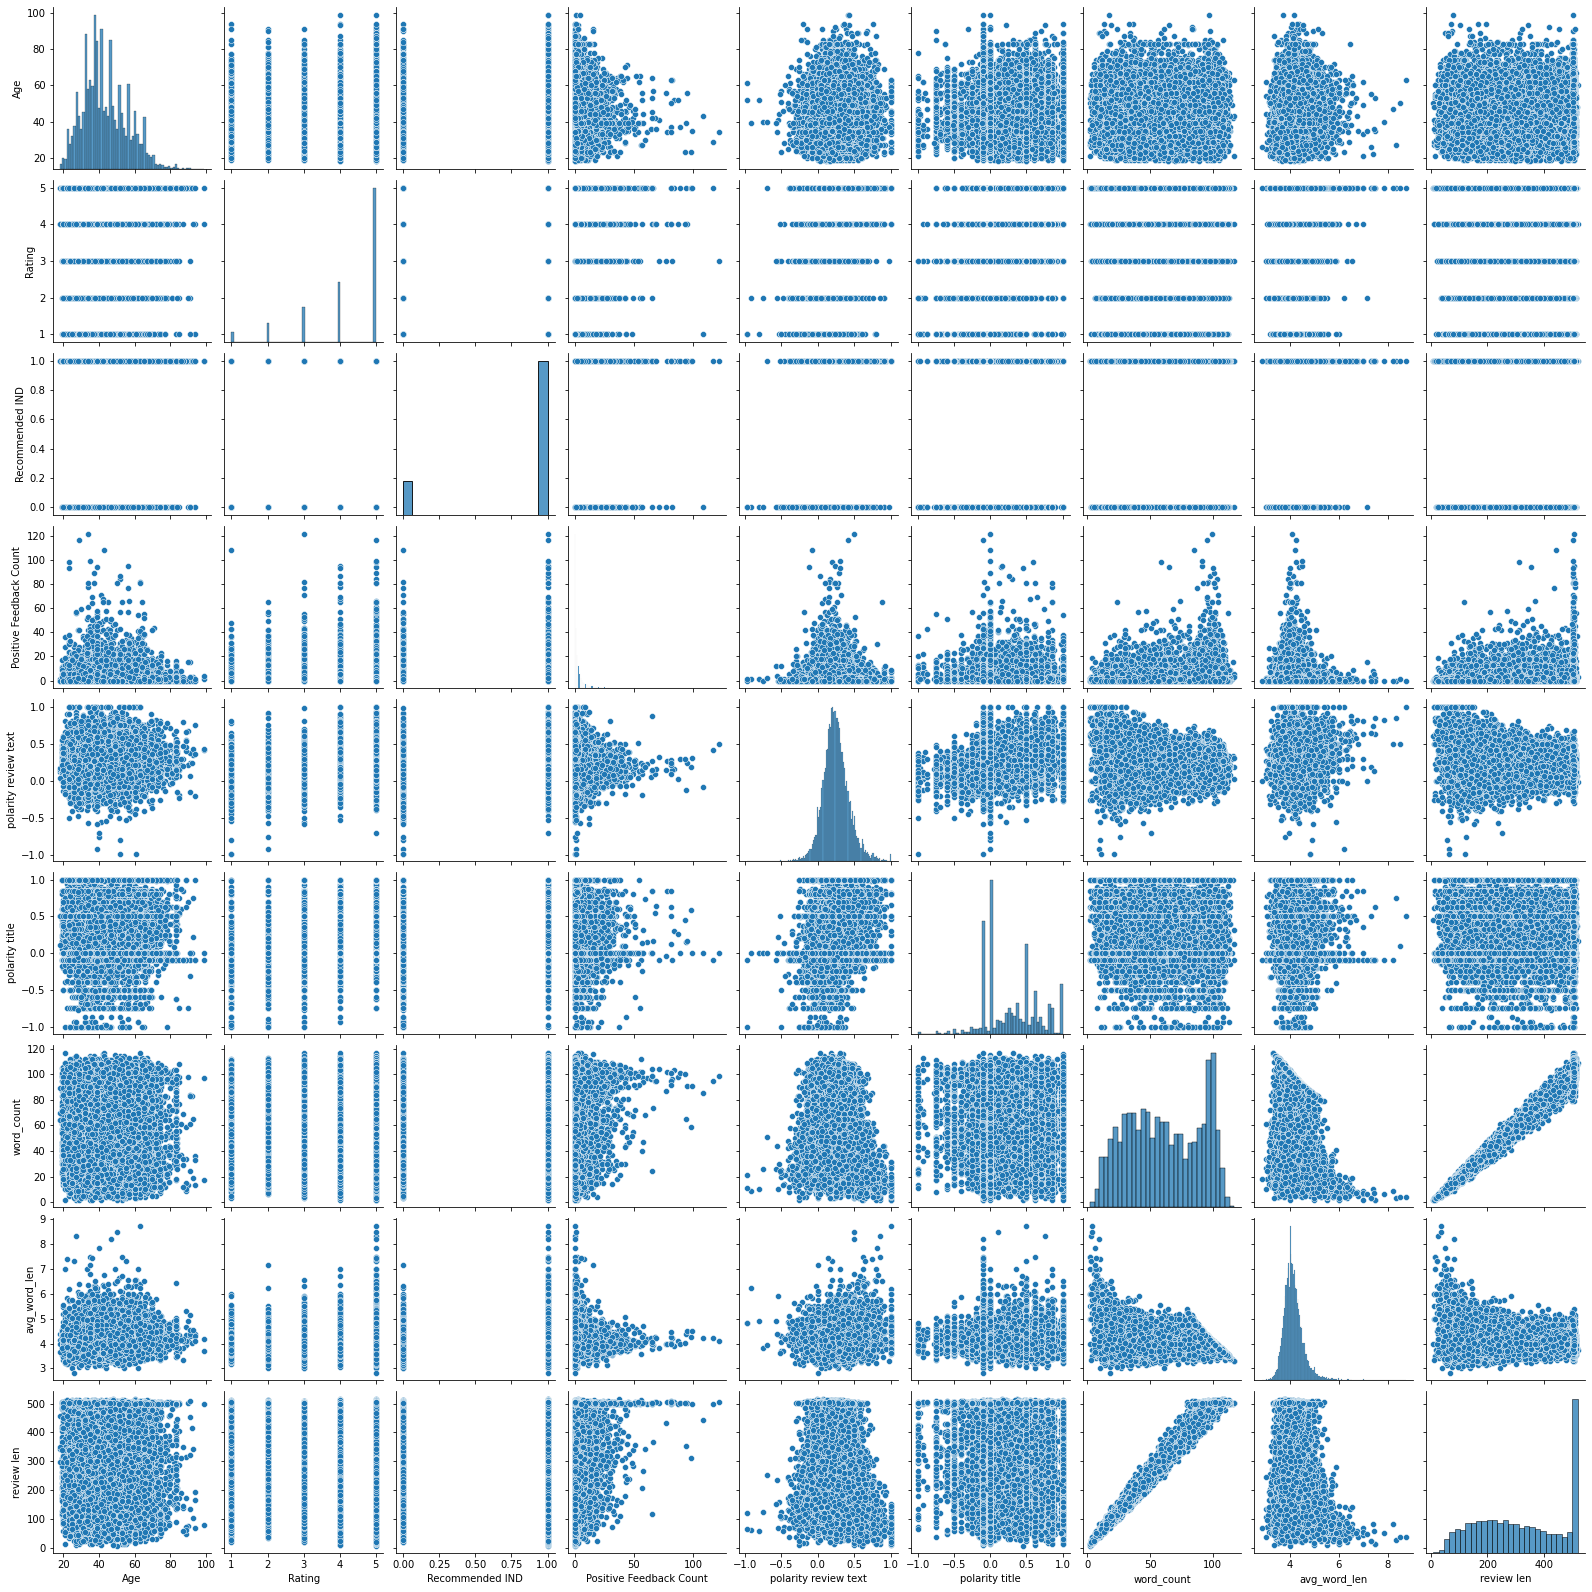

In [128]:
sns.pairplot(df)

In [129]:
df.corr()

Age    Rating  Recommended IND  \
Age                      1.000000  0.030121         0.034312   
Rating                   0.030121  1.000000         0.792543   
Recommended IND          0.034312  0.792543         1.000000   
Positive Feedback Count  0.040807 -0.060845        -0.065833   
polarity review text     0.008583  0.388740         0.321938   
polarity title           0.003920  0.363335         0.320429   
word_count               0.010460 -0.057382        -0.029348   
avg_word_len             0.032981  0.056122         0.022759   
review len               0.014135 -0.055906        -0.031268   

                         Positive Feedback Count  polarity review text  \
Age                                     0.040807              0.008583   
Rating                                 -0.060845              0.388740   
Recommended IND                        -0.065833              0.321938   
Positive Feedback Count                 1.000000             -0.083451   
polarity review text                   -0.083451              1.000000   
polarity title                         -0.036828              0.212236   
word_count                              0.187136             -0.296672   
avg_word_len                           -0.029869              0.156623   
review len                              0.190935             -0.292869   

                         polarity title  word_count  avg_word_len  review len  
Age                            0.003920    0.010460      0.032981    0.014135  
Rating                         0.363335   -0.057382      0.056122   -0.055906  
Recommended IND                0.320429   -0.029348      0.022759   -0.031268  
Positive Feedback Count       -0.036828    0.187136     -0.029869    0.190935  
polarity review text           0.212236   -0.296672      0.156623   -0.292869  
polarity title                 1.000000    0.009613     -0.000212    0.009495  
word_count                     0.009613    1.000000     -0.314239    0.991470  
avg_word_len                  -0.000212   -0.314239      1.000000   -0.214778  
review len                     0.009495    0.991470     -0.214778    1.000000

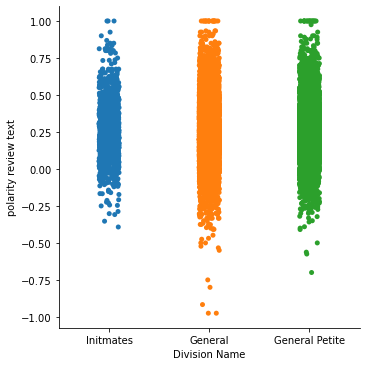

In [130]:
sns.catplot(x="Division Name",y="polarity review text",data=df)

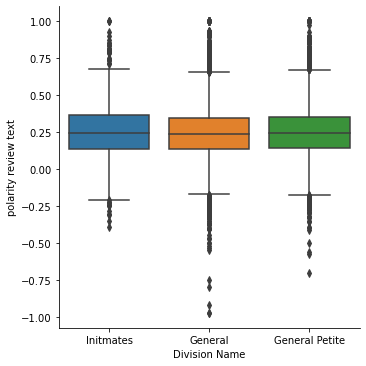

In [131]:
sns.catplot(x="Division Name",y="polarity review text",data=df,kind="box")

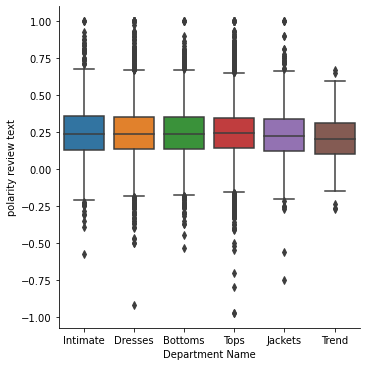

In [33]:
sns.catplot(x="Department Name",y="polarity review text",data=df,kind="box")

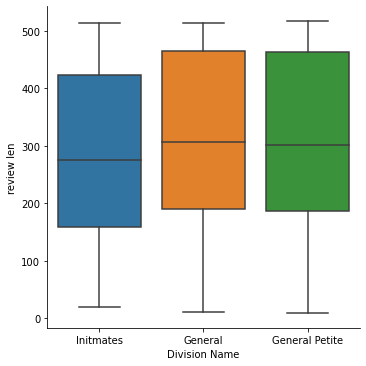

In [34]:
sns.catplot(x="Division Name",y="review len",data=df , kind="box")

In [35]:
import plotly.express as px
import plotly.graph_objects as go

In [40]:
df["Recommended IND"].unique()

array([1, 0])

In [58]:
x1 = df[df["Recommended IND"]==1]["polarity review text"]
x0 = df[df["Recommended IND"]==0]["polarity review text"]

In [45]:
x1
x0

Recommended IND  polarity review text
2                    0              0.073675
5                    0              0.178750
10                   0             -0.097149
22                   0             -0.045595
25                   0              0.261508
...                ...                   ...
23449                0             -0.039583
23450                0              0.215368
23460                0              0.100370
23478                0             -0.078788
23483                0              0.414286

[4101 rows x 2 columns]

In [61]:
trace0 = go.Histogram(x = x0 , name = "Not Recommended",opacity =0.7 )
trace1 = go.Histogram(x = x1 , name = "Recommended",opacity =0.7 )

In [62]:
data = [trace0,trace1]
layout = go.Layout(barmode = "overlay",title="Distrubtion of Sentiment Polarity")
fig  = go.Figure(data=data, layout=layout)
fig.show()

In [63]:
#Dieser Graph ist ein Beweis, dass die Polarity Funktion funktioniert 

# Distribution of Ratings Based on Ratings

In [68]:
x1 = df[df["Recommended IND"]==1]["Rating"]
x0 = df[df["Recommended IND"]==0]["Rating"]

In [69]:
trace0 = go.Histogram(x = x0 , name = "Not Recommended",opacity =0.7 )
trace1 = go.Histogram(x = x1 , name = "Recommended",opacity =0.7 )

In [71]:
data = [trace0,trace1]
layout = go.Layout(barmode = "overlay",title="Distrubtion of Ratings")
fig  = go.Figure(data=data, layout=layout)
fig.show()

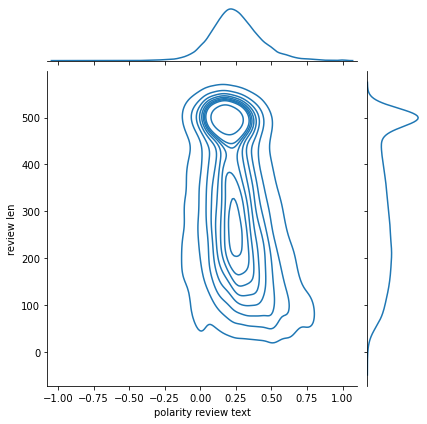

In [72]:
sns.jointplot(x="polarity review text",y="review len",data=df,kind="kde")